In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import re
from copy import deepcopy
import matplotlib.pyplot as plt
from collections import Counter
import operator


In [2]:
def removeEdges(n, G):
    minor = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] < n]
    G.remove_edges_from(minor)
    return G

def removeNodes(n, G):
    minor_actors = []
    for x in G.nodes:
        if G.degree(x) < n:
            minor_actors.append(x)

    G.remove_nodes_from(minor_actors)
    return G

def get_centrality(G):
    df = pd.DataFrame(index=G.nodes())
    df['Degree'] = pd.Series(dict(G.degree()))
    df['Degree Centrality'] = pd.Series(nx.degree_centrality(G))
    df['Closeness Centrality'] = pd.Series(nx.closeness_centrality(G))
    df['Betweenness Centrality'] = pd.Series(nx.betweenness_centrality(G, normalized=True))
    df = df.sort_values(by=['Degree'], ascending=False)
    return df

def get_degree_centrality(G):
    df = pd.DataFrame(index=G.nodes())
    df['Degree'] = pd.Series(dict(G.degree()))
    df['Degree Centrality'] = pd.Series(nx.degree_centrality(G))
    df = df.sort_values(by=['Degree'], ascending=False)
    return df

def get_closeness_centrality(G):
    df = pd.DataFrame(index=G.nodes())
    df['Degree'] = pd.Series(dict(G.degree()))
    df['Closeness Centrality'] = pd.Series(nx.closeness_centrality(G))
    df = df.sort_values(by=['Degree'], ascending=False)
    return df

def get_betweeness_centrality(G):
    df = pd.DataFrame(index=G.nodes())
    df['Degree'] = pd.Series(dict(G.degree()))
    df['Betweenness Centrality'] = pd.Series(nx.betweenness_centrality(G, normalized=True))
    df = df.sort_values(by=['Degree'], ascending=False)
    return df

def get_JC(G):
    df = pd.DataFrame(index=nx.non_edges(G))
    CommNeighbor = {}
    JaccardCoef = {}
    for edge in nx.non_edges(G): 
        CommNeighbor[edge[0],edge[1]] = len(list(nx.common_neighbors(G,edge[0],edge[1])))
    for value in list(nx.jaccard_coefficient(G)): 
        JaccardCoef[value[0],value[1]] = round(value[2],1)
    df['Common Neighbor'] = pd.Series(CommNeighbor)
    df['Jaccard Coefficient'] = pd.Series(JaccardCoef)
    df = df.sort_values(['Jaccard Coefficient', 'Common Neighbor'], ascending=False)
    return df

## Importing the dataset

In [3]:
movieActors = open('ScriptOutput/movie-actors.tsv')
data = movieActors.readlines()
g = nx.Graph()

## Converting the dataset into a graph

In [4]:
for row in data:
    tempSplit = re.split(r'\t+', row)
    movie = tempSplit[0]
    actors = tempSplit[1]

    # Remove {
    actors = actors.strip('{')

    # Remove } at the end
    actors = actors[:len(actors)-2]

    # Remove single quotation marks
    actors = actors.replace('\'', '')

    # Remove commas and turn the string into a list
    actorsList = actors.split(", ")

    for i in range(0, len(actorsList)):
        for j in range(0, len(actorsList)):
            if i < j:
                if g.has_edge(actorsList[i], actorsList[j]) == False:
                    g.add_edge(actorsList[i], actorsList[j], weight=1)
                else:
                    g[actorsList[i]][actorsList[j]
                                     ]['weight'] = g[actorsList[i]][actorsList[j]]['weight']+1


In [5]:
print("Original Graph:")
print("Edges: ", g.number_of_edges())
print("Nodes: ", g.number_of_nodes())

Original Graph:
Edges:  2082113
Nodes:  133414


## Creating actorMovie dictionary

In [6]:
actorMovieDic = {}
for row in data:
    tempSplit = re.split(r'\t+', row)
    movie = tempSplit[0]
    actors = tempSplit[1]

    # Remove {
    actors = actors.strip('{')

    # Remove } at the end
    actors = actors[:len(actors)-2]

    # Remove single quotation marks
    actors = actors.replace('\'', '')

    # Remove commas and turn the string into a list
    actorsList = actors.split(", ")

    for i in range(1, len(actorsList)):
        if actorsList[i] in actorMovieDic.keys():
            actorMovieDic[actorsList[i]].append(movie)
        else:
            actorMovieDic[actorsList[i]] = []
            actorMovieDic[actorsList[i]].append(movie)

actorMovieDic = dict((k, [int(s) for s in v])
                     for k, v in actorMovieDic.items())


In [7]:
# Testing if the actorMovieDic dict is formatted correctly
print(actorMovieDic["Lobo Sebastian"])

[975900, 1409356, 14935392, 5994199, 3326231, 30578638, 474571, 19502184]


In [8]:
# Sum of the movies each actor has worked in
actorSize = {}
for i in actorMovieDic:
    actorSize[i] = len(actorMovieDic[i])


<h1>Threshold 1 (Mainly for Visualization)</h1> 

### Edge weight < 10 and node degree < 10

In [9]:
g1 = deepcopy(g)
g1 = removeEdges(10, g1)
g1 = removeNodes(10, g1)

# Check the number of nodes and edges in our graph
print("Edges: ", g1.number_of_edges())
print("Nodes: ", g1.number_of_nodes())

Edges:  157
Nodes:  54


In [10]:
# Sum of the weights of each degree of a node
actorSize_Updated = {}
for i in actorSize:
    if g1.has_node(i):
        actorSize_Updated[i] = actorSize[i]

# List of degree for each node
sizes = list(actorSize_Updated.values())

# Adjusting the values of the degree so that the nodes can be differentiated while plotting
scaled_sizes = []
for i in sizes:
    scaled_sizes.append(i * 10)
    
print(nx.adjacency_matrix(g1))

  (0, 1)	14
  (0, 2)	42
  (0, 6)	16
  (0, 15)	49
  (0, 28)	28
  (0, 30)	29
  (0, 32)	11
  (0, 38)	27
  (0, 41)	24
  (1, 0)	14
  (1, 2)	13
  (1, 6)	10
  (1, 15)	30
  (1, 28)	19
  (1, 30)	11
  (1, 32)	13
  (1, 38)	14
  (1, 41)	11
  (2, 0)	42
  (2, 1)	13
  (2, 6)	12
  (2, 15)	29
  (2, 22)	11
  (2, 28)	20
  (2, 30)	22
  :	:
  (46, 43)	10
  (46, 44)	17
  (46, 47)	12
  (46, 50)	13
  (47, 8)	14
  (47, 40)	47
  (47, 43)	20
  (47, 44)	18
  (47, 46)	12
  (47, 50)	27
  (48, 2)	12
  (48, 15)	21
  (48, 28)	20
  (48, 32)	13
  (49, 26)	72
  (49, 27)	72
  (49, 37)	43
  (50, 8)	12
  (50, 40)	50
  (50, 43)	12
  (50, 44)	14
  (50, 46)	13
  (50, 47)	27
  (51, 53)	17
  (53, 51)	17


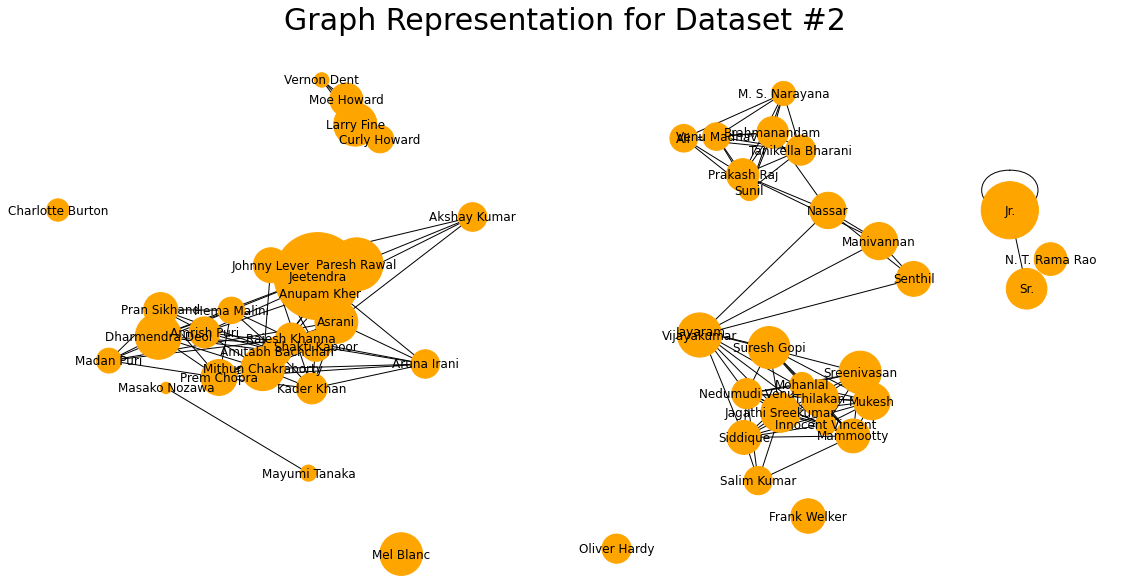

In [11]:
plt.figure(figsize=(20, 10))
plt.title('Graph Representation for Dataset #2', fontsize=30, backgroundcolor= 'white')
pos = nx.spring_layout(g1, k=0.8, iterations=25)
nx.draw(g1, pos, with_labels=True, node_size=scaled_sizes, node_color='orange')

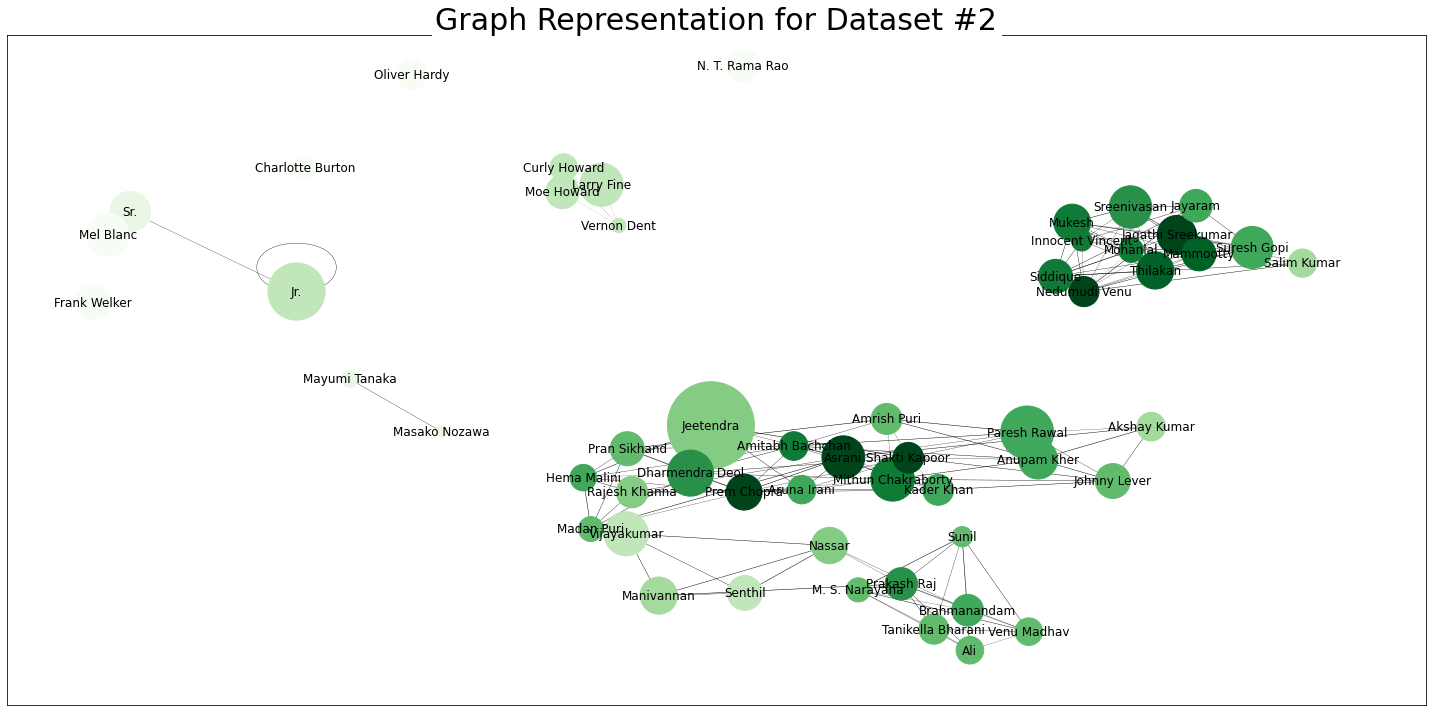

In [12]:
plt.figure(figsize=(20, 10))
plt.title('Graph Representation for Dataset #2', fontsize=30, backgroundcolor= 'white')
pos = nx.spring_layout(g1, k=0.7, iterations=25)
node_color = [g1.degree(v) for v in g1]
edge_width = [5 * (1/g1[u][v]['weight']) for u, v in g1.edges()]
nx.draw_networkx(g1, pos, with_labels=True, node_size=scaled_sizes, node_color=node_color, width=edge_width, cmap=plt.cm.Greens)
plt.tight_layout()


In [13]:
# Finding Centrality
df1 = get_centrality(g1)
df1.head(25)

,Degree,Degree Centrality,Closeness Centrality,Betweenness Centrality
Jagathi Sreekumar,11,0.207547,0.207547,0.002164
Nedumudi Venu,11,0.207547,0.207547,0.002164
Shakti Kapoor,11,0.207547,0.237080,0.009965
Asrani,11,0.207547,0.237080,0.014033
Prem Chopra,11,0.207547,0.237080,0.008483
Thilakan,10,0.188679,0.190252,0.000713
Mammootty,10,0.188679,0.190252,0.001611
Mohanlal,9,0.169811,0.175617,0.000402
Innocent Vincent,9,0.169811,0.175617,0.000402
Siddique,9,0.169811,0.175617,0.001279


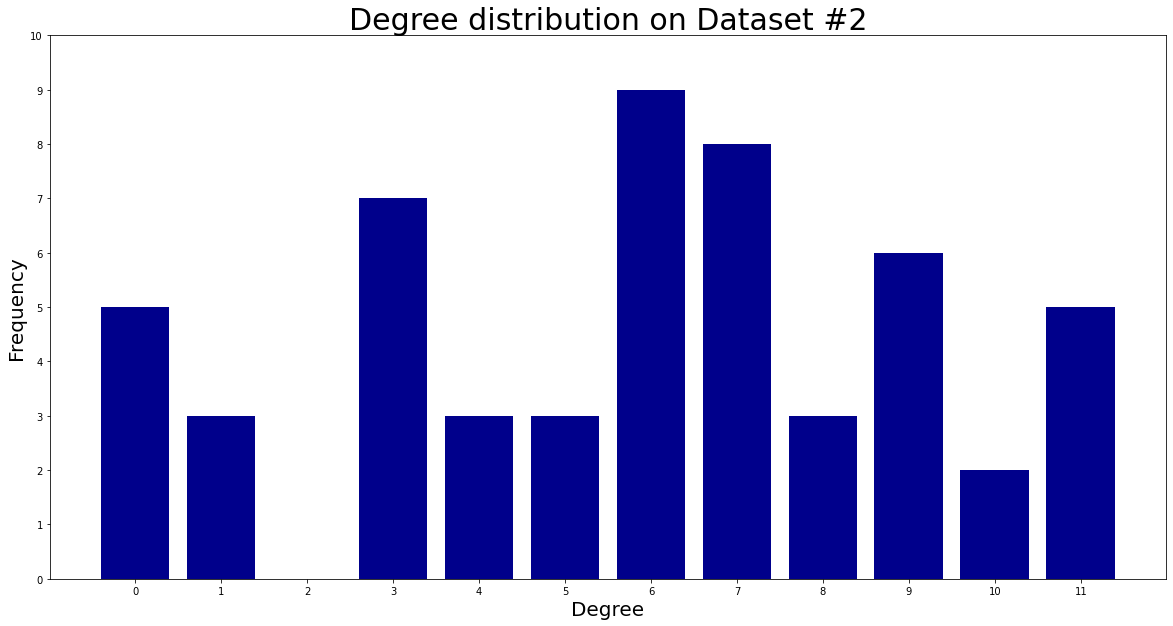

In [14]:
# Degree distribution graph representing each degree and frequency
x = list(range(0, len(nx.degree_histogram(g1))))
y = nx.degree_histogram(g1)

plt.figure(figsize=(20,10))
plt.bar(x, y, color='darkblue')
plt.xticks(x)
plt.yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.title('Degree distribution on Dataset #2', fontsize=30)
plt.xlabel('Degree', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.show()


In [15]:
# Total cliques
cliquesList = list(nx.find_cliques(g1))
for clique in cliquesList:
    print("Size:", len(clique), clique)
print("Total Cliques: ", len(cliquesList))

Size: 4 ['Amrish Puri', 'Anupam Kher', 'Mithun Chakraborty', 'Shakti Kapoor']
Size: 4 ['Amrish Puri', 'Anupam Kher', 'Paresh Rawal', 'Amitabh Bachchan']
Size: 4 ['Amrish Puri', 'Anupam Kher', 'Paresh Rawal', 'Shakti Kapoor']
Size: 3 ['Amrish Puri', 'Pran Sikhand', 'Amitabh Bachchan']
Size: 4 ['Senthil', 'Nassar', 'Manivannan', 'Vijayakumar']
Size: 3 ['Brahmanandam', 'Prakash Raj', 'Nassar']
Size: 7 ['Brahmanandam', 'Prakash Raj', 'Sunil', 'Ali', 'Venu Madhav', 'M. S. Narayana', 'Tanikella Bharani']
Size: 7 ['Mukesh', 'Mammootty', 'Jagathi Sreekumar', 'Thilakan', 'Nedumudi Venu', 'Mohanlal', 'Suresh Gopi']
Size: 8 ['Mukesh', 'Mammootty', 'Jagathi Sreekumar', 'Thilakan', 'Nedumudi Venu', 'Mohanlal', 'Innocent Vincent', 'Siddique']
Size: 8 ['Mukesh', 'Mammootty', 'Jagathi Sreekumar', 'Thilakan', 'Nedumudi Venu', 'Mohanlal', 'Innocent Vincent', 'Sreenivasan']
Size: 5 ['Thilakan', 'Jayaram', 'Jagathi Sreekumar', 'Nedumudi Venu', 'Suresh Gopi']
Size: 6 ['Thilakan', 'Jayaram', 'Jagathi Sreeku

In [16]:
df2 = get_JC(g1)
df2.head(25)


,Common Neighbor,Jaccard Coefficient
"(Sreenivasan, Siddique)",8,0.9
"(Sreenivasan, Suresh Gopi)",7,0.9
"(Mukesh, Jayaram)",7,0.8
"(Innocent Vincent, Suresh Gopi)",7,0.8
"(Suresh Gopi, Siddique)",7,0.8
"(Mohanlal, Jayaram)",7,0.8
"(Mammootty, Jayaram)",7,0.7
"(Amitabh Bachchan, Shakti Kapoor)",7,0.5
"(Mithun Chakraborty, Amitabh Bachchan)",6,0.5
"(Asrani, Dharmendra Deol)",6,0.5


<h1>Threshold 2 (Centrality and JC)</h1> 

### Eedge weight < 4 and node degree < 2

In [17]:
g2 = deepcopy(g)
g2 = removeEdges(4, g2)
g2 = removeNodes(2, g2)

# Check the number of nodes and edges in our graph
print("Edges: ", g2.number_of_edges())
print("Nodes: ", g2.number_of_nodes())


Edges:  10552
Nodes:  2742


In [18]:
# Sum of the weights of each degree of a node
actorSize_Updated = {}
for i in actorSize:
    if g2.has_node(i):
        actorSize_Updated[i] = actorSize[i]

# List of degree for each node
sizes = list(actorSize_Updated.values())

# Adjusting the values of the degree so that the nodes can be differentiated while plotting
scaled_sizes = []
for i in sizes:
    scaled_sizes.append(i * 10)
    
print(nx.adjacency_matrix(g2))

  (0, 201)	4
  (0, 578)	4
  (1, 1040)	5
  (1, 1768)	5
  (1, 2701)	4
  (2, 46)	4
  (2, 1162)	4
  (3, 2255)	4
  (5, 670)	4
  (6, 927)	4
  (6, 995)	4
  (7, 46)	4
  (7, 927)	4
  (7, 2167)	4
  (8, 2420)	4
  (8, 2701)	6
  (9, 1039)	4
  (10, 131)	4
  (10, 657)	4
  (10, 748)	5
  (10, 877)	4
  (10, 995)	4
  (10, 1810)	4
  (10, 2405)	4
  (10, 2641)	4
  :	:
  (2737, 2482)	4
  (2737, 2643)	4
  (2737, 2710)	4
  (2737, 2738)	4
  (2737, 2739)	4
  (2738, 2236)	4
  (2738, 2482)	4
  (2738, 2643)	4
  (2738, 2710)	4
  (2738, 2737)	4
  (2738, 2739)	4
  (2739, 2236)	4
  (2739, 2482)	4
  (2739, 2643)	4
  (2739, 2710)	4
  (2739, 2737)	4
  (2739, 2738)	4
  (2740, 1373)	4
  (2740, 1507)	4
  (2741, 2128)	6
  (2741, 2129)	6
  (2741, 2346)	4
  (2741, 2469)	6
  (2741, 2477)	4
  (2741, 2575)	4


In [19]:
# Finding Centrality
df3 = get_centrality(g2)
df3.head(25)

,Degree,Degree Centrality,Closeness Centrality,Betweenness Centrality
Jr.,127,0.046333,0.148586,0.177189
Mithun Chakraborty,115,0.041955,0.116797,0.007219
Shakti Kapoor,108,0.039402,0.118201,0.004430
Dharmendra Deol,106,0.038672,0.113250,0.006198
Amitabh Bachchan,103,0.037578,0.112193,0.004549
Prakash Raj,101,0.036848,0.112309,0.008109
Brahmanandam,97,0.035389,0.101078,0.004412
Nassar,95,0.034659,0.107509,0.003919
Amrish Puri,90,0.032835,0.116232,0.003387
Anupam Kher,87,0.031740,0.118525,0.006534


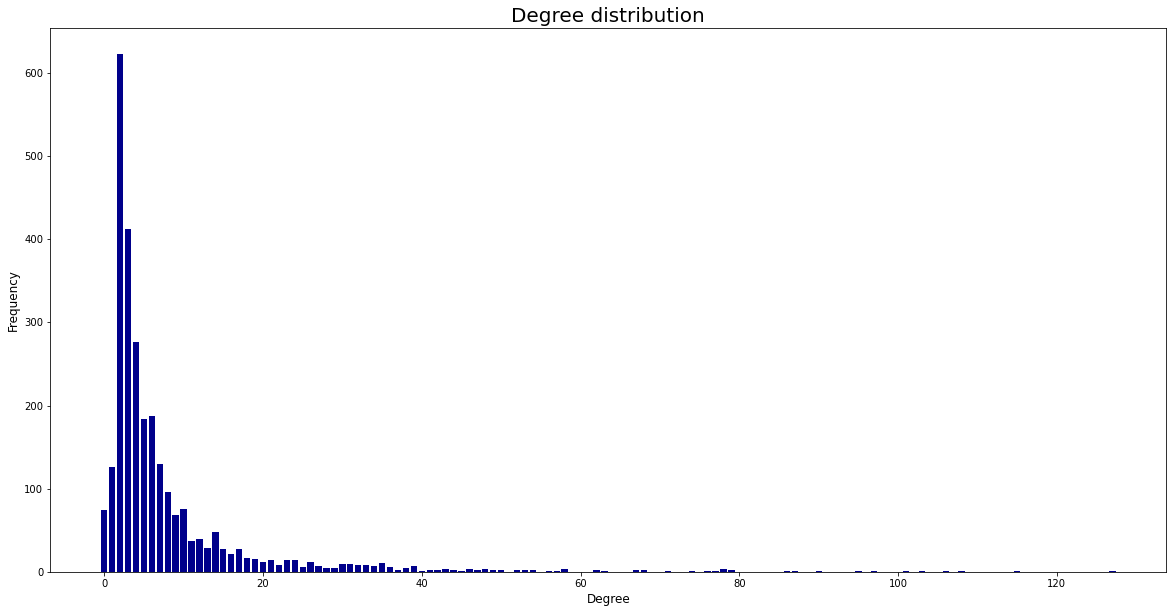

In [20]:
# Degree distribution graph representing each degree and frequency
x = list(range(0, len(nx.degree_histogram(g2))))
y = nx.degree_histogram(g2)

plt.figure(figsize=(20, 10))
plt.bar(x, y, color='darkblue')
plt.title('Degree distribution', fontsize=20)
plt.xlabel('Degree', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


In [21]:
# Total cliques
cliquesList = list(nx.find_cliques(g2))
for clique in cliquesList:
    print("Size:", len(clique), clique)
print("Total Cliques: ", len(cliquesList))


Size: 2 ['Christian Clavier', 'Gérard Depardieu']
Size: 5 ['Christian Clavier', 'Josiane Balasko', 'Thierry Lhermitte', 'Marie-Anne Chazel', 'Michel Blanc']
Size: 4 ['Christian Clavier', 'Josiane Balasko', 'Thierry Lhermitte', 'Gérard Jugnot']
Size: 6 ['Patsy Rowlands', 'Peter Butterworth', 'Bernard Bresslaw', 'Joan Sims', 'Sid James', 'Kenneth Williams']
Size: 3 ['Amol Palekar', 'Utpal Dutt', 'Mithun Chakraborty']
Size: 6 ['Kiran Kumar', 'Mohnish Behl', 'Anupam Kher', 'Reema Lagoo', 'Johnny Lever', 'Gulshan Grover']
Size: 6 ['Kiran Kumar', 'Mohnish Behl', 'Anupam Kher', 'Reema Lagoo', 'Johnny Lever', 'Salman Khan']
Size: 7 ['Kiran Kumar', 'Mohnish Behl', 'Anupam Kher', 'Shakti Kapoor', 'Kader Khan', 'Sadashiv Amrapurkar', 'Gulshan Grover']
Size: 8 ['Kiran Kumar', 'Mohnish Behl', 'Anupam Kher', 'Shakti Kapoor', 'Kader Khan', 'Govinda', 'Johnny Lever', 'Gulshan Grover']
Size: 8 ['Kiran Kumar', 'Mohnish Behl', 'Anupam Kher', 'Shakti Kapoor', 'Kader Khan', 'Govinda', 'Johnny Lever', 'Salm

In [22]:
df4 = get_JC(g2)
df4.head(25)

,Common Neighbor,Jaccard Coefficient
"(Janyse Jaud, Maryke Hendrikse)",5,1.0
"(Yūko Minaguchi, Bin Shimada)",5,1.0
"(Marion Ramsey, G. W. Bailey)",5,1.0
"(Bess Flowers, Harry Semels)",5,1.0
"(Phyllis Crane, James C. Morton)",4,1.0
"(Phyllis Crane, Monte Collins)",4,1.0
"(Winston and Weston Doty, Peggy Cartwright)",4,1.0
"(Ethelreda Leopold, Duke York)",4,1.0
"(Peter Hüttner, Michael Nyqvist)",4,1.0
"(James C. Morton, Monte Collins)",4,1.0


## Degree Distribution on original graph G

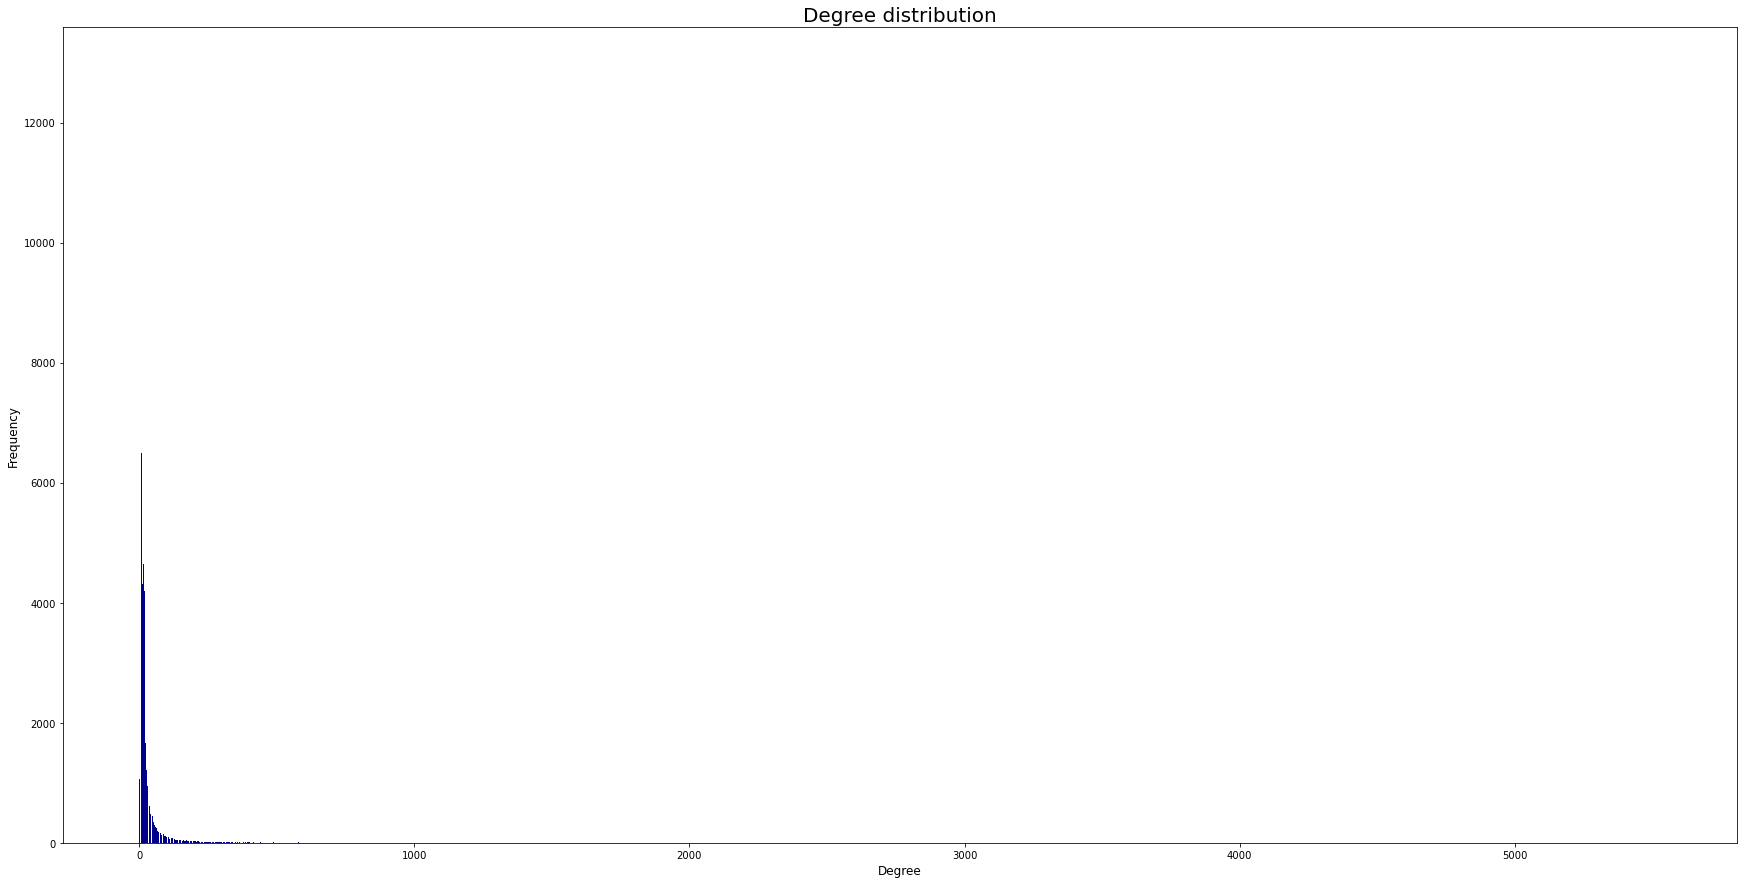

In [23]:
# Degree distribution graph representing each degree and frequency
x = list(range(0, len(nx.degree_histogram(g))))
y = nx.degree_histogram(g)

plt.figure(figsize=(30, 15))
plt.bar(x, y, color='darkblue')
plt.title('Degree distribution', fontsize=20)
plt.xlabel('Degree', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


## Import Actor-Gender Script

In [24]:
actorGender = open('ScriptOutput/actor-gender.tsv')
data = actorGender.readlines()
actorGenderDict = {}
for row in data:
    tempSplit = re.split(r'\t+', row)
    actor = tempSplit[0]
    gender = tempSplit[1]

    # Remove {
    gender = gender.strip('{\'')

    # Remove } at the end
    gender = gender.replace('\'}\n', '')

    actorGenderDict[actor] = gender
actorGenderDict


{'Wanda De Jesus': 'F',
 'Natasha Henstridge': 'F',
 'Ice Cube': 'M',
 'Jason Statham': 'M',
 'Clea DuVall': 'F',
 'Pam Grier': 'F',
 'Joanna Cassidy': 'F',
 'Richard Cetrone': 'M',
 'Liam Waite': 'M',
 'Duane Davis': 'M',
 'Lobo Sebastian': 'M',
 'Rodney A. Grant': 'M',
 'Peter Jason': 'M',
 'Rick Edelstein': 'M',
 'Doug McGrath': 'M',
 'Robert Carradine': 'M',
 'Rosemary Forsyth': 'F',
 'Allen Cutler': 'M',
 'Alice Barrett': 'F',
 'Rod Britt': 'M',
 'Hildy Brooks': 'F',
 'Robert Catrini': 'M',
 'Cliff DeYoung': 'M',
 'Gary Dubin': 'M',
 'Judi Evans': 'F',
 'Julia Granstrom': 'F',
 'Brad Greenquist': 'M',
 'Albert Hall': 'M',
 'Brad Heller': 'M',
 'Jeff Juday': 'M',
 'Chris Krisea': 'M',
 'J. Patrick McCormack': 'M',
 'Frank Krog': 'M',
 'Kristin Kajander': 'F',
 'Vidar Sandem': 'M',
 'Anne Krigsvoll': 'F',
 'Gudrun Landgrebe': 'F',
 'Mathieu Carrière': 'M',
 'Hanns Zischler': 'M',
 'Hector Elias': 'M',
 'John Hawkes': 'M',
 'Miranda July': 'F',
 'Miles Thompson': 'M',
 'Brandon Ratcl

In [25]:
M = Counter(actorGenderDict.values())['M']
print("Male actors:", M)
F = Counter(actorGenderDict.values())['F']
print("Female actors:", F)
JC_index = list(df4.index)
JC_index


Male actors: 60759
Female actors: 35657


[('Janyse Jaud', 'Maryke Hendrikse'),
 ('Yūko Minaguchi', 'Bin Shimada'),
 ('Marion Ramsey', 'G. W. Bailey'),
 ('Bess Flowers', 'Harry Semels'),
 ('Phyllis Crane', 'James C. Morton'),
 ('Phyllis Crane', 'Monte Collins'),
 ('Winston and Weston Doty', 'Peggy Cartwright'),
 ('Ethelreda Leopold', 'Duke York'),
 ('Peter Hüttner', 'Michael Nyqvist'),
 ('James C. Morton', 'Monte Collins'),
 ('Gunnel Lindblom', 'Åke Fridell'),
 ('Jimmy Finlayson', 'Baldwin Cooke'),
 ('Jimmy Finlayson', 'Lyle Tayo'),
 ('Jimmy Finlayson', 'Edgar Dearing'),
 ('Rosina Lawrence', 'Leonard Landy'),
 ('Phil Arnold', 'Frank Sully'),
 ('Phil Arnold', 'Connie Cezon'),
 ('Phil Arnold', 'Margie Liszt'),
 ('Phil Arnold', 'Suzanne Ridgeway'),
 ('Phil Arnold', 'Benny Rubin'),
 ('Phil Arnold', 'Jean Willes'),
 ('Coen Hissink', 'Esther De Boer-van Rijk'),
 ('Baldwin Cooke', 'Lyle Tayo'),
 ('Baldwin Cooke', 'Edgar Dearing'),
 ('Alessandro Juliani', 'Nicole Oliver'),
 ('Alessandro Juliani', 'Ashleigh Ball'),
 ('Frank Sully', 'Co

In [26]:
Male_Male = 0
Female_Female = 0
Male_Female = 0
for i in range(len(JC_index)):
    if actorGenderDict.get(JC_index[i][0]) != None and actorGenderDict.get(JC_index[i][1]) != None:
        actor1Gender = actorGenderDict[JC_index[i][0]]
        actor2Gender = actorGenderDict[JC_index[i][1]]
        if actor1Gender == "M" and actor2Gender == "M":
            Male_Male = Male_Male + 1
        elif actor1Gender == "F" and actor2Gender == "F":
            Female_Female = Female_Female + 1
        else:
            Male_Female = Male_Female + 1
print("Pair of male actors", Male_Male)
print("Pair of female actors", Female_Female)
print("Pair of male and female actors", Male_Female)


Pair of male actors 1738212
Pair of female actors 330312
Pair of male and female actors 1529922


In [27]:
actorsList = list(g2.nodes())
male = 0
female = 0
for i in range(len(actorsList)):
    if actorGenderDict.get(actorsList[i]) != None:
        actorGender = actorGenderDict[actorsList[i]]
        if actorGender == "M":
            male = male + 1
        else:
            female = female + 1
print("Total males in the subgraph:", male)
print("Total females in the subgraph:", female)


Total males in the subgraph: 1868
Total females in the subgraph: 819


## Import Actor-Language Script

In [28]:
actorGender = open('ScriptOutput/actor-language.tsv')
data = actorGender.readlines()
actorLangDict = {}
for row in data:
    tempSplit = re.split(r'\t+', row)
    actor = tempSplit[0]
    language = tempSplit[1]
    language = language.replace('\n', '')
    actorLangDict[actor] = language
actorLangDict


{'Wanda De Jesus': 'English',
 'Natasha Henstridge': 'English',
 'Ice Cube': 'English',
 'Jason Statham': 'English',
 'Clea DuVall': 'English',
 'Pam Grier': 'English',
 'Joanna Cassidy': 'English',
 'Richard Cetrone': 'English',
 'Liam Waite': 'English',
 'Duane Davis': 'English',
 'Lobo Sebastian': 'English',
 'Rodney A. Grant': 'English',
 'Peter Jason': 'English',
 'Doug McGrath': 'English',
 'Robert Carradine': 'English',
 'Rosemary Forsyth': 'English',
 'Allen Cutler': 'English',
 'Alice Barrett': 'English',
 'Rod Britt': 'English',
 'Hildy Brooks': 'English',
 'Robert Catrini': 'English',
 'Cliff DeYoung': 'English',
 'Gary Dubin': 'English',
 'Judi Evans': 'English',
 'Julia Granstrom': 'English',
 'Brad Greenquist': 'English',
 'Albert Hall': 'English',
 'Brad Heller': 'English',
 'Jeff Juday': 'English',
 'Chris Krisea': 'English',
 'J. Patrick McCormack': 'English',
 'Frank Krog': 'Norwegian',
 'Kristin Kajander': 'Norwegian',
 'Vidar Sandem': 'Norwegian',
 'Anne Krigsvoll':

<h1>Validation</h1> 

## Import Movie-Revenue Script

In [29]:
movieRevenue = open('ScriptOutput/movie-revenue.tsv')
data = movieRevenue.readlines()
movieRevenueDict = {}
for row in data:
    tempSplit = re.split(r'\t+', row)
    movie = int(tempSplit[0])
    revenue = tempSplit[1]
    revenue = revenue.replace('\n', '')
    revenue = revenue.replace('{\'', '')
    revenue = int(revenue.replace('\'}', ''))
    movieRevenueDict[movie] = revenue
movieRevenueDict


{10408933: 3600000,
 171005: 10161099,
 77856: 102272727,
 612710: 21521,
 156558: 29381649,
 1364293: 932000,
 261237: 34331783,
 12008535: 11091868,
 4951456: 3416846,
 5708633: 172055,
 12053509: 3960327,
 7364373: 3500000,
 7028314: 3600000,
 12788657: 17810894,
 3873713: 4736013,
 164387: 33300000,
 24282217: 638181,
 7767613: 4000000,
 164388: 4702575,
 22985953: 1400000,
 3550323: 529677,
 1765938: 45000000,
 1305819: 4650000,
 1031231: 351447,
 6305925: 11130889,
 196176: 11148828,
 748616: 9524745,
 31505444: 665523,
 336846: 394589888,
 3033993: 37311672,
 103021: 35000000,
 1940449: 10600000,
 6703617: 127906624,
 362719: 300218018,
 4459059: 14598571,
 3681139: 26255594,
 5549065: 152523164,
 171058: 9493259,
 2608958: 44480039,
 2546429: 32980880,
 31686022: 13996,
 24416479: 869235,
 12490207: 2549834,
 3883051: 10054150,
 1033297: 102441078,
 207680: 106683817,
 1858682: 2000000,
 7235116: 10278549,
 5254729: 9576495,
 19168185: 26377,
 27504492: 17917697,
 20506905: 160

In [30]:
actorRevenue = {}
for actor, movie in actorMovieDic.items():
    revenue = 0
    for i in movie:
        if movieRevenueDict.__contains__(i):
            revenue += movieRevenueDict[i]
    actorRevenue[actor] = revenue
actorRevenue

{'Richard Cetrone': 147990122,
 'Liam Waite': 0,
 'Natasha Henstridge': 334604791,
 'Clea DuVall': 659392965,
 'Rodney A. Grant': 650726826,
 'Rick Edelstein': 0,
 'Lobo Sebastian': 275543840,
 'Rosemary Forsyth': 0,
 'Duane Davis': 57296414,
 'Ice Cube': 1016761205,
 'Robert Carradine': 311590292,
 'Joanna Cassidy': 584777189,
 'Pam Grier': 399241745,
 'Wanda De Jesus': 77318486,
 'Peter Jason': 265552417,
 'Doug McGrath': 115342673,
 'Hildy Brooks': 17487531,
 'Alice Barrett': 0,
 'Julia Granstrom': 0,
 'Cliff DeYoung': 144946661,
 'Judi Evans': 0,
 'Jeff Juday': 0,
 'Allen Cutler': 0,
 'Chris Krisea': 453558070,
 'Robert Catrini': 0,
 'Rod Britt': 0,
 'Albert Hall': 760924511,
 'Gary Dubin': 264575633,
 'J. Patrick McCormack': 178966569,
 'Brad Greenquist': 193111239,
 'Vidar Sandem': 0,
 'Kristin Kajander': 0,
 'Frank Krog': 0,
 'Gudrun Landgrebe': 0,
 'Hanns Zischler': 134458911,
 'John Hawkes': 1351781888,
 'Brandon Ratcliff': 8012838,
 'Natasha Slayton': 8012838,
 'Carlie Wester

In [31]:
updatedActorRevenue = {}
for key, value in actorRevenue.items():
    if value != 0:
        updatedActorRevenue[key] = value
updatedActorRevenue = dict(sorted(updatedActorRevenue.items(), key=operator.itemgetter(1),reverse=True))
updatedActorRevenue

{'Jr.': 14940323508,
 'Samuel L. Jackson': 12157986785,
 'Robbie Coltrane': 10083693602,
 'Warwick Davis': 9547961788,
 'Maggie Smith': 9280351864,
 'Hugo Weaving': 8835326318,
 'Gary Oldman': 8458630397,
 'John Ratzenberger': 8414363017,
 'Tom Felton': 8332480256,
 'Geraldine Somerville': 7865888917,
 'Emma Watson': 7865082838,
 'Daniel Radcliffe': 7863062755,
 'Tom Cruise': 7861339740,
 'Rupert Grint': 7709601021,
 'Bonnie Wright': 7706147978,
 'Matthew David Lewis': 7706147978,
 'Timothy Spall': 7618962253,
 'Helena Bonham Carter': 7515737943,
 'Mark Williams': 7509143773,
 'Frank Welker': 7452327472,
 'Christopher Lee': 7357710271,
 'Julie Walters': 7356048388,
 'Jason Isaacs': 7221069735,
 'Morgan Freeman': 7133104499,
 'Bruce Willis': 7058402656,
 'John Cleese': 7021508397,
 'David Bradley': 6937708534,
 'Eddie Murphy': 6911139743,
 'Johnny Depp': 6870927678,
 'Michael Gambon': 6837026309,
 'Alfred Enoch': 6749748267,
 'Ralph Fiennes': 6649834688,
 'Cameron Diaz': 6547667790,
 'R

### New Threshold: Edge weight < 3 and node degree < 3

In [32]:
g3 = deepcopy(g)
g3 = removeEdges(3, g3)
g3 = removeNodes(3, g3)

# Check the number of nodes and edges in our graph
print("Edges: ", g3.number_of_edges())
print("Nodes: ", g3.number_of_nodes())


Edges:  21971
Nodes:  4257


In [34]:
df5 = get_centrality(g3)
df5.head(25)

,Degree,Degree Centrality,Closeness Centrality,Betweenness Centrality
Jr.,291,0.068374,0.219071,0.220141
Amitabh Bachchan,167,0.039239,0.105762,0.004313
Mithun Chakraborty,159,0.037359,0.101249,0.003523
Anupam Kher,150,0.035244,0.108307,0.004884
Shakti Kapoor,146,0.034305,0.099873,0.001379
Prakash Raj,143,0.033600,0.103481,0.004548
Dharmendra Deol,137,0.032190,0.096047,0.001621
Nassar,134,0.031485,0.096806,0.002184
Paresh Rawal,130,0.030545,0.100145,0.002933
Brahmanandam,130,0.030545,0.092620,0.002805


In [35]:
for actor in df5.index:
    if updatedActorRevenue.__contains__(actor):
        df5.at[actor, 'Box Office Revenue'] = updatedActorRevenue[actor]
df5 = df5.sort_values(['Betweenness Centrality', 'Box Office Revenue'], ascending=False)
df5['Betweenness Centrality'] = df5['Betweenness Centrality'].astype(float).round(5)
df5.head(25)

,Degree,Degree Centrality,Closeness Centrality,Betweenness Centrality,Box Office Revenue
Jr.,291,0.068374,0.219071,0.22014,1.494032e+10
Jackie Chan,43,0.010103,0.170206,0.03418,2.638756e+09
Frank Welker,104,0.024436,0.176224,0.02054,7.452327e+09
Sr.,74,0.017387,0.174448,0.02037,1.377237e+09
Samuel L. Jackson,48,0.011278,0.175382,0.01614,1.215799e+10
Max von Sydow,17,0.003994,0.164479,0.01564,2.830571e+09
David Niven,19,0.004464,0.171228,0.01498,4.257455e+08
Jack Mulhall,9,0.002115,0.166976,0.01175,NaN
Christopher Lee,44,0.010338,0.159223,0.01148,7.357710e+09
Moe Howard,80,0.018797,0.121506,0.01079,4.633286e+07


In [36]:
df5 = df5[(df5[['Betweenness Centrality','Degree']] != 0).all(axis=1)]
df5 = df5.dropna()

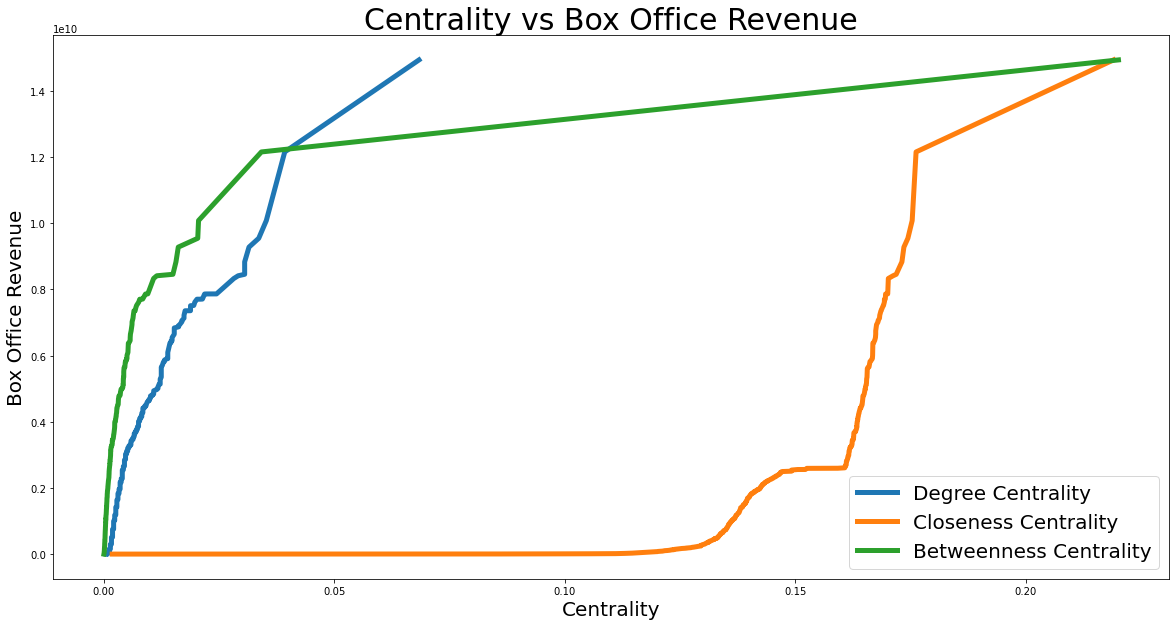

In [37]:
x_degree_centrality = sorted(list(df5['Degree Centrality']))
x_closeness_centrality = sorted(list(df5['Closeness Centrality']))
x_betweenness_centrality = sorted(list(df5['Betweenness Centrality']))
y = sorted(list(df5['Box Office Revenue']))
plt.figure(figsize=(20, 10))
plt.plot(x_degree_centrality, y, label='Degree Centrality', linewidth=5)
plt.plot(x_closeness_centrality, y, label='Closeness Centrality', linewidth=5)
plt.plot(x_betweenness_centrality, y, label='Betweenness Centrality', linewidth=5)
plt.title("Centrality vs Box Office Revenue", fontsize=30)
plt.xlabel('Centrality', fontsize=20)
plt.ylabel('Box Office Revenue', fontsize=20)
plt.legend(fontsize=20)
plt.show()